#A Comparative Analysis of State-of-the-Art Algorithms for Robust Deep Fake Detection

## Project Overview:

In this Colab project, we conducted a comprehensive comparison of deepfake detection models, focusing on Convolutional Neural Networks (CNN), Gated Recurrent Units (GRU), and Long Short-Term Memory (LSTM) architectures. Our goal was to assess and contrast the performance of these models in identifying deepfake videos.

## Experimental Setup:

- **Platform:** Google Colab
- **GPU:** NVIDIA T4
- **Python Version:** 3.10.12
- **Libraries:**
  - Torch (PyTorch) for deep learning
  - OpenCV (cv2) for video and image processing
  - Seaborn for visualization
  - Numpy for numerical operations


## Results:

- **CNN Model Accuracy:** Approximately 60% on the DFDC dataset.
- **LSTM Model Accuracy:** Approximately 83% on the DFDC dataset.
- **GRU Model Accuracy:** Achieving an impressive accuracy of 85% on the DFDC dataset.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install face_recognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=d44648ca6c3067601d57eaaa642bb377b9765b0669bedb7cf022e03f777dd1a5
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
#THis code is to check if the video is corrupted or not..
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames
#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path)
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

video_fil = glob.glob('/content/drive/MyDrive/Preprocessed_FAKE_Face_only_data/*.mp4')
video_fil += glob.glob('/content/drive/MyDrive/Preprocessed_REAL_Face_only_data/*.mp4')

print("Total no of videos :" , len(video_fil))
print(video_fil)
count = 0;
for i in video_fil:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video_fil) - count))
    print("Corrupted video is : " , i)
    continue
print((len(video_fil) - count))


Total no of videos : 3293
['/content/drive/MyDrive/Preprocessed_FAKE_Face_only_data/cnbxddelwb.mp4', '/content/drive/MyDrive/Preprocessed_FAKE_Face_only_data/cmsgfgmofg.mp4', '/content/drive/MyDrive/Preprocessed_FAKE_Face_only_data/ctwvhdkmkx.mp4', '/content/drive/MyDrive/Preprocessed_FAKE_Face_only_data/bpcimjvhlu.mp4', '/content/drive/MyDrive/Preprocessed_FAKE_Face_only_data/elkbjpwigu.mp4', '/content/drive/MyDrive/Preprocessed_FAKE_Face_only_data/dvvrufajch.mp4', '/content/drive/MyDrive/Preprocessed_FAKE_Face_only_data/dngvaozylo.mp4', '/content/drive/MyDrive/Preprocessed_FAKE_Face_only_data/bfdlyfihvy.mp4', '/content/drive/MyDrive/Preprocessed_FAKE_Face_only_data/bmfkkzheii.mp4', '/content/drive/MyDrive/Preprocessed_FAKE_Face_only_data/abvgbvoxco.mp4', '/content/drive/MyDrive/Preprocessed_FAKE_Face_only_data/dhpsvaichc.mp4', '/content/drive/MyDrive/Preprocessed_FAKE_Face_only_data/bkzrsfcrcr.mp4', '/content/drive/MyDrive/Preprocessed_FAKE_Face_only_data/cexrhgoikd.mp4', '/content/d

In [ ]:
#Load the dataset
import json
import glob
import numpy as np
import cv2
import copy
import random
video_files = glob.glob('/content/drive/MyDrive/Preprocessed_FAKE_Face_only_data/*.mp4')
video_files += glob.glob('/content/drive/MyDrive/Preprocessed_REAL_Face_only_data/*.mp4')
random.shuffle(video_files)
random.shuffle(video_files)
frame_count = []
for video_file in video_files:
  cap = cv2.VideoCapture(video_file)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    video_files.remove(video_file)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
print("frames are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))


frames are  [148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 104, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 144, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 145, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 122, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 146, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 135, 148, 148, 148, 148, 148, 148, 148, 132, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 14

In [ ]:
# load d_metadata.csv
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = video_path.split('/')[-1]
        #print(temp_video)
        label = self.labels.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        #print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
#plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [ ]:
#count the number of fake and real videos
def number_of_real_and_fake_videos(data_list):
  header_list = ["file","label"]
  lab = pd.read_csv('/content/drive/MyDrive/df_metadata.csv',names=header_list)
  fake = 0
  real = 0
  for i in data_list:
    temp_video = i.split('/')[-1]
    label = lab.iloc[(labels.loc[labels["file"] == temp_video].index.values[0]),1]
    if(label == 'FAKE'):
      fake+=1
    if(label == 'REAL'):
      real+=1
  return real,fake

train :  2617
test :  655
TRAIN:  Real: 1372  Fake: 1245


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


TEST:  Real: 349  Fake: 306


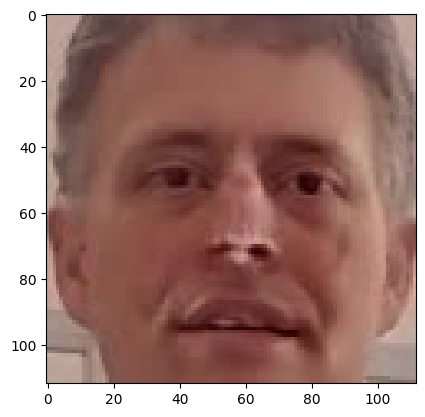

In [ ]:
#Train Test Split

# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split

header_list = ["file","label"]
labels = pd.read_csv('/content/drive/MyDrive/df_metadata.csv',names=header_list)

train_videos,valid_videos = train_test_split(video_files,test_size = 0.2)
print("train : " , len(train_videos))
print("test : " , len(valid_videos))
print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])


im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])
train_data = video_dataset(train_videos,labels,sequence_length = 10,transform = train_transforms)
#print(train_data)
val_data = video_dataset(valid_videos,labels,sequence_length = 10,transform = train_transforms)
train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 4)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 4)
image,label = train_data[0]
im_plot(image[0,:,:,:])

#LSTM Model

In [ ]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [ ]:
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    torch.save(model.state_dict(),'/content/checkpoint.pt')
    return losses.avg,accuracies.avg
def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1)
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [ ]:
import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [ ]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

[Epoch 1/20] [Batch 654 / 655] [Loss: 0.641890, Acc: 61.75%]Testing
[Batch 163 / 164]  [Loss: 0.526088, Acc: 76.79%]
Accuracy 76.79389312977099
[Epoch 2/20] [Batch 654 / 655] [Loss: 0.538605, Acc: 75.89%]Testing
[Batch 163 / 164]  [Loss: 0.452795, Acc: 79.08%]
Accuracy 79.08396946564885
[Epoch 3/20] [Batch 654 / 655] [Loss: 0.480055, Acc: 79.75%]Testing
[Batch 163 / 164]  [Loss: 0.403090, Acc: 81.98%]
Accuracy 81.98473282442748
[Epoch 4/20] [Batch 654 / 655] [Loss: 0.435613, Acc: 84.91%]Testing
[Batch 163 / 164]  [Loss: 0.435614, Acc: 79.85%]
Accuracy 79.8473282442748
[Epoch 5/20] [Batch 654 / 655] [Loss: 0.423038, Acc: 85.02%]Testing
[Batch 163 / 164]  [Loss: 0.442699, Acc: 80.31%]
Accuracy 80.30534351145039
[Epoch 6/20] [Batch 654 / 655] [Loss: 0.381912, Acc: 87.50%]Testing
[Batch 163 / 164]  [Loss: 0.410197, Acc: 83.21%]
Accuracy 83.20610687022901
[Epoch 7/20] [Batch 654 / 655] [Loss: 0.351198, Acc: 88.77%]Testing
[Batch 163 / 164]  [Loss: 0.367846, Acc: 86.41%]
Accuracy 86.41221374

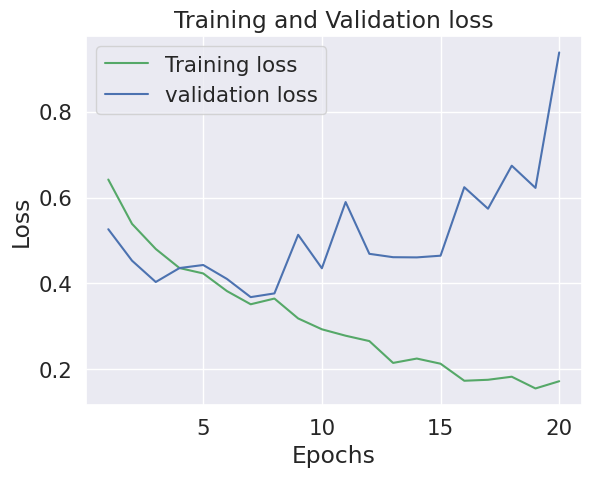

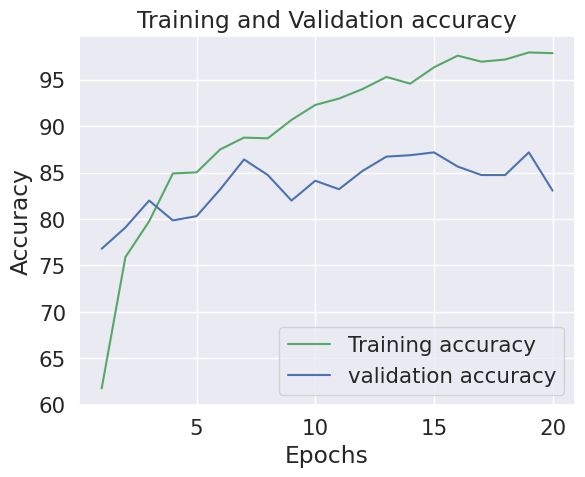

[[281  23]
 [ 88 263]]
True positive =  281
False positive =  23
False negative =  88
True negative =  263




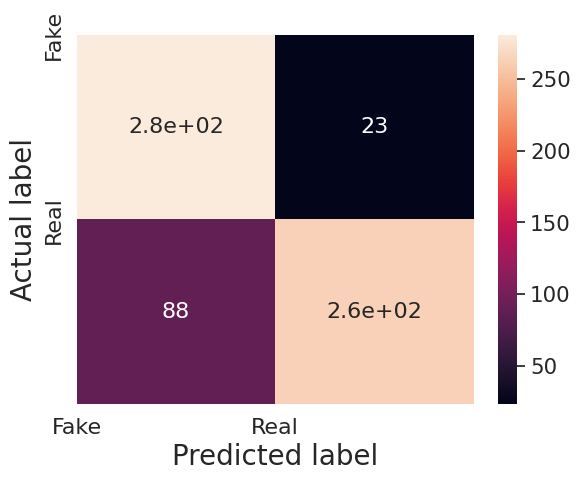

Calculated Accuracy 83.05343511450381


In [ ]:
from sklearn.metrics import confusion_matrix
#learning rate
lr = 1e-5#0.001
#number of epochs
num_epochs = 20

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)


#ResNeXt50 CNN Model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Xception2(nn.Module):
    def __init__(self, input_shape=(3, 112, 112)):
        super(Xception2, self).__init__()
        channel_axis = 1  # Assuming input is (batch_size, channels, height, width)
        self.model = nn.Sequential(
            nn.Conv2d(input_shape[0], 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=(3, 3), padding=(1, 1)),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=(3, 3), padding=(1, 1)),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=(3, 3), padding=(1, 1)),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=(3, 3), padding=(1, 1)),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d(1)  # Global Average Pooling
        )

    def forward(self, x):
        return self.model(x)

class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.cnn_model = Xception2()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(512, num_classes)  # Adjust input size based on the last layer in your CNN

    def forward(self, x):
        batch_size, seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.cnn_model(x)  # Corrected reference to the CNN model
        x = F.adaptive_avg_pool2d(fmap, 1)  # Replaced avgpool with adaptive_avg_pool2d
        x = x.view(batch_size, seq_length, -1)
        return fmap, self.dp(self.linear1(torch.mean(x, dim=1)))

# Instantiate the model
num_classes = 2  # Adjust based on your task
model = CNNModel(num_classes)


In [ ]:
import torch
import numpy as np
from torchvision import transforms

# Assuming your CNN model is already defined (CNNModel class)
num_classes = 2  # Adjust based on your task
cnn_model = CNNModel(num_classes).cuda()

# Create dummy input data (1 sample, 20 frames, 3 channels, 112x112 resolution)
dummy_input = np.empty((1, 20, 3, 112, 112))

# Convert the dummy input to a PyTorch tensor and move it to the GPU
input_tensor = torch.from_numpy(dummy_input).type(torch.cuda.FloatTensor)

# Pass the input through the CNN model
with torch.no_grad():
    cnn_model.eval()  # Set the model to evaluation mode (important for dropout)
    output_feature_map, output_logits = cnn_model(input_tensor)

# Print the output
print("Feature Map Shape:", output_feature_map.shape)
print("Logits Shape:", output_logits.shape)



Feature Map Shape: torch.Size([20, 512, 1, 1])
Logits Shape: torch.Size([1, 2])


In [ ]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100 * n_correct_elems / batch_size

def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()

    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()

        _, outputs = model(inputs)
        loss = criterion(outputs, targets)
        acc = calculate_accuracy(outputs, targets)

        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sys.stdout.write(
            "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
            % (
                epoch,
                num_epochs,
                i,
                len(data_loader),
                losses.avg,
                accuracies.avg
            )
        )

    torch.save(model.state_dict(), '/content/checkpoint.pt')
    return losses.avg, accuracies.avg

def test(epoch, model, data_loader, criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []

    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.LongTensor)
                inputs = inputs.cuda()

            _, outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets))
            acc = calculate_accuracy(outputs, targets)

            _, p = torch.max(outputs, 1)
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()

            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))

            sys.stdout.write(
                "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                % (
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg
                )
            )

    print('\nAccuracy {}'.format(accuracies.avg))
    return true, pred, losses.avg, accuracies.avg

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[Epoch 1/20] [Batch 654 / 655] [Loss: 0.654950, Acc: 63.62%]Testing
[Batch 163 / 164]  [Loss: 0.680724, Acc: 58.02%]
Accuracy 58.01526717557252
[Epoch 2/20] [Batch 654 / 655] [Loss: 0.650635, Acc: 62.82%]Testing
[Batch 163 / 164]  [Loss: 0.739941, Acc: 58.47%]
Accuracy 58.47328244274809
[Epoch 3/20] [Batch 654 / 655] [Loss: 0.654832, Acc: 63.51%]Testing
[Batch 163 / 164]  [Loss: 0.692272, Acc: 58.47%]
Accuracy 58.47328244274809
[Epoch 4/20] [Batch 654 / 655] [Loss: 0.654863, Acc: 64.12%]Testing
[Batch 163 / 164]  [Loss: 0.677319, Acc: 61.22%]
Accuracy 61.221374045801525
[Epoch 5/20] [Batch 654 / 655] [Loss: 0.651704, Acc: 63.47%]Testing
[Batch 163 / 164]  [Loss: 0.658026, Acc: 61.53%]
Accuracy 61.52671755725191
[Epoch 6/20] [Batch 654 / 655] [Loss: 0.648942, Acc: 64.69%]Testing
[Batch 163 / 164]  [Loss: 0.679645, Acc: 62.75%]
Accuracy 62.74809160305343
[Epoch 7/20] [Batch 654 / 655] [Loss: 0.647172, Acc: 64.88%]Testing
[Batch 163 / 164]  [Loss: 0.709955, Acc: 59.54%]
Accuracy 59.541984

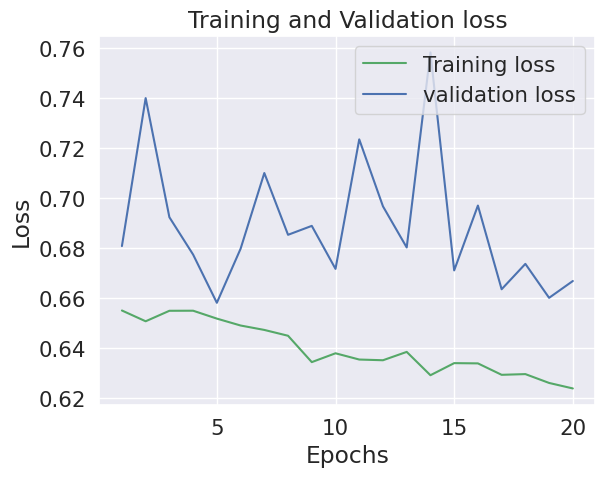

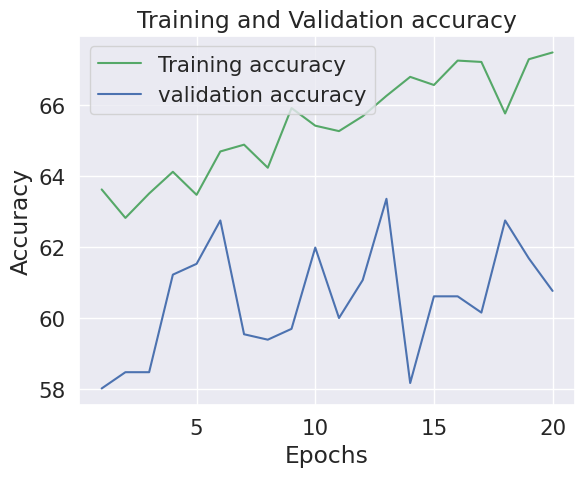

[[240  64]
 [193 158]]
True positive =  240
False positive =  64
False negative =  193
True negative =  158




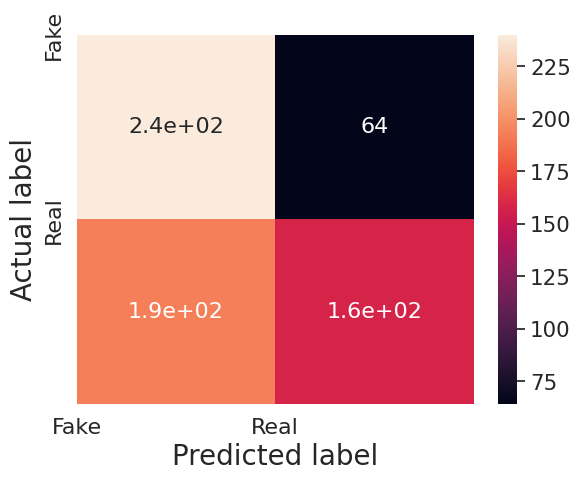

Calculated Accuracy 60.76335877862596


In [ ]:
from sklearn.metrics import confusion_matrix
import torch
import torch.nn as nn
from torch.autograd import Variable
import time
import os
import sys

# Instantiate the model
num_classes = 2  # Adjust based on your task

# Set learning rate and number of epochs
lr = 1e-5
num_epochs = 20

# Define optimizer and criterion
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=lr, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss().cuda()

# Lists to store training and testing metrics
train_loss_avg = []
train_accuracy = []
test_loss_avg = []
test_accuracy = []

# Training and testing loop
for epoch in range(1, num_epochs + 1):
    # Training
    train_loss, train_acc = train_epoch(epoch, num_epochs, train_loader, cnn_model, criterion, optimizer)
    train_loss_avg.append(train_loss)
    train_accuracy.append(train_acc)

    # Testing
    true, pred, test_loss, test_acc = test(epoch, cnn_model, valid_loader, criterion)
    test_loss_avg.append(test_loss)
    test_accuracy.append(test_acc)

# Plot the training and testing metrics
plot_loss(train_loss_avg, test_loss_avg, len(train_loss_avg))
plot_accuracy(train_accuracy, test_accuracy, len(train_accuracy))

# Display confusion matrix
print(confusion_matrix(true, pred))

# Display and plot confusion matrix
print_confusion_matrix(true, pred)


#GRU Model

In [ ]:
import torch
import numpy as np
from torchvision import models
from torch import nn
from torch.nn import functional as F

class UpdatedModel(nn.Module):
    def __init__(self, num_classes, latent_dim=2048, rnn_layers=1, hidden_dim=2048, bidirectional=False):
        super(UpdatedModel, self).__init__()

        # Use ResNet-50 as the base CNN
        model = models.resnext50_32x4d(pretrained=True)
        self.model = nn.Sequential(*list(model.children())[:-2])

        # Adjust the latent_dim based on the output of the ResNet-50
        latent_dim = 2048

        self.gru = nn.GRU(latent_dim, hidden_dim, rnn_layers, bidirectional)
        self.relu = nn.LeakyReLU()

        # Add Batch Normalization
        self.batch_norm = nn.BatchNorm1d(hidden_dim * 2 if bidirectional else hidden_dim)

        # Increase Dropout
        self.dp = nn.Dropout(0.5)

        self.linear1 = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)

    def forward(self, x):
        batch_size, seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size, seq_length, -1)  # Adjust to the output size of the ResNet-50
        x_gru, _ = self.gru(x)

        # Apply Batch Normalization
        x_gru = self.batch_norm(x_gru.view(-1, x_gru.shape[-1])).view(x_gru.shape)

        # Apply Dropout
        x_gru = self.dp(x_gru)

        return fmap, self.linear1(torch.mean(x_gru, dim=1))

# Creating an instance of UpdatedModel
num_classes = 2
gru_model = UpdatedModel(num_classes).cuda()

# Generating a sample input tensor
sample_input = torch.from_numpy(np.random.rand(1, 20, 3, 224, 224).astype(np.float32)).cuda()

# Performing forward pass
output_feature_map, predictions = model(sample_input)

# Displaying the results
print("Output Feature Map Shape:", output_feature_map.shape)
print("Predictions Shape:", predictions.shape)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Output Feature Map Shape: torch.Size([20, 2048, 7, 7])
Predictions Shape: torch.Size([1, 2])


In [ ]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    torch.save(model.state_dict(),'/content/checkpoint.pt')
    return losses.avg,accuracies.avg
def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1)
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[Epoch 1/20] [Batch 654 / 655] [Loss: 0.638671, Acc: 63.39%]Testing
[Batch 163 / 164]  [Loss: 0.553333, Acc: 72.06%]
Accuracy 72.06106870229007
[Epoch 2/20] [Batch 654 / 655] [Loss: 0.523543, Acc: 74.63%]Testing
[Batch 163 / 164]  [Loss: 0.540702, Acc: 73.74%]
Accuracy 73.74045801526718
[Epoch 3/20] [Batch 654 / 655] [Loss: 0.450620, Acc: 78.98%]Testing
[Batch 163 / 164]  [Loss: 0.524020, Acc: 75.57%]
Accuracy 75.57251908396947
[Epoch 4/20] [Batch 654 / 655] [Loss: 0.387552, Acc: 82.61%]Testing
[Batch 163 / 164]  [Loss: 0.599626, Acc: 75.73%]
Accuracy 75.72519083969466
[Epoch 5/20] [Batch 654 / 655] [Loss: 0.340147, Acc: 85.36%]Testing
[Batch 163 / 164]  [Loss: 0.478244, Acc: 79.54%]
Accuracy 79.54198473282443
[Epoch 6/20] [Batch 654 / 655] [Loss: 0.309593, Acc: 86.36%]Testing
[Batch 163 / 164]  [Loss: 0.500752, Acc: 80.00%]
Accuracy 80.0
[Epoch 7/20] [Batch 654 / 655] [Loss: 0.289190, Acc: 87.50%]Testing
[Batch 163 / 164]  [Loss: 0.513246, Acc: 80.15%]
Accuracy 80.1526717557252
[Epoch

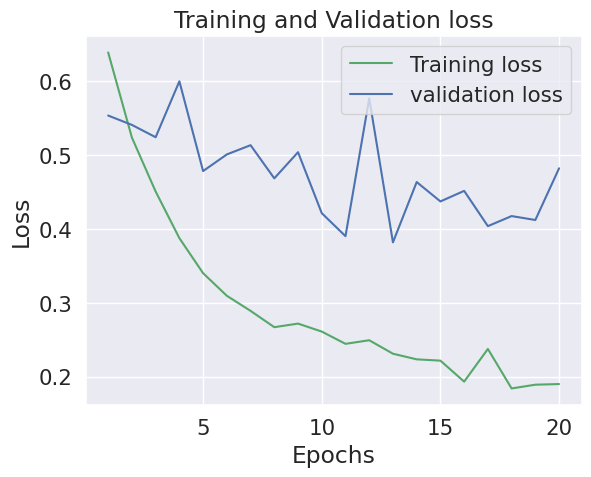

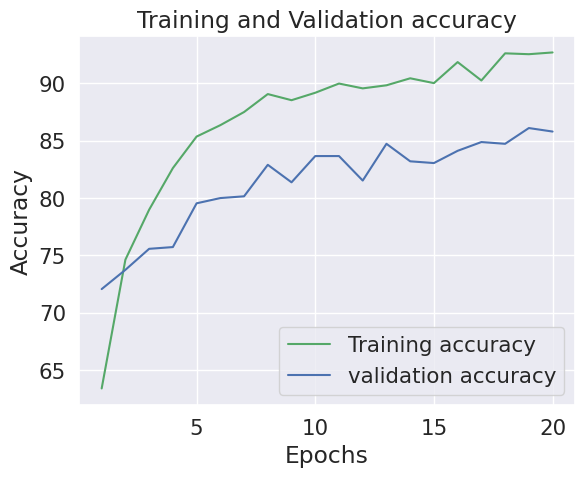

[[247  59]
 [ 34 315]]
True positive =  247
False positive =  59
False negative =  34
True negative =  315




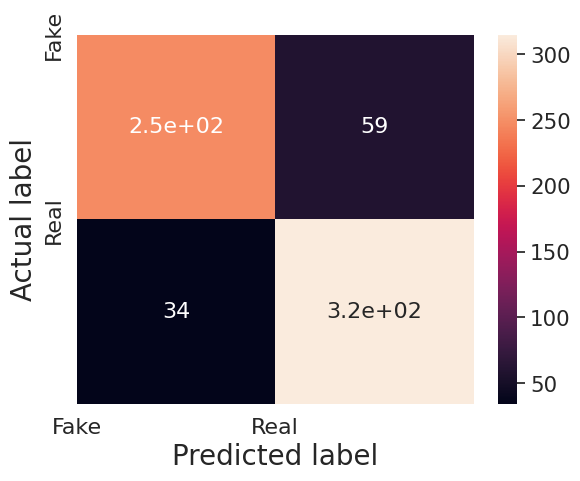

Calculated Accuracy 85.80152671755725


In [ ]:
from sklearn.metrics import confusion_matrix
#learning rate
lr = 1e-5#0.001
#number of epochs
num_epochs = 20

optimizer = torch.optim.Adam(gru_model.parameters(), lr= lr,weight_decay = 1e-5)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,gru_model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,gru_model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)


In [ ]:
import sys
print(sys.version)


3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
